In [ ]:
# Mengimport library yang dibutuhkan
import pandas as pd  # Untuk manipulasi dan analisis data
import numpy as np  # Untuk operasi numerik
import seaborn as sns  # Untuk visualisasi data
import itertools  # Untuk membuat iterasi kombinasi dari list
import matplotlib # Untuk visualisasi data
import statsmodels # Untuk analisis statistik dan model
import statsmodels.api as sm  # Untuk analisis statistik dan model
import statsmodels.tsa.api as smt  # Untuk analisis time series dalam statsmodels
from prophet import Prophet  # Untuk membuat dan melatih model peramalan Prophet
from prophet.plot import plot_cross_validation_metric  # Untuk memplot metrik cross-validation dalam Prophet
from prophet.diagnostics import performance_metrics, cross_validation  # Untuk diagnosa dan metrik performa dalam Prophet
from sklearn.metrics import mean_absolute_percentage_error  # Untuk menghitung Mean Absolute Percentage Error (MAPE)
from statsmodels.tsa.holtwinters import ExponentialSmoothing  # Untuk model Exponential Smoothing dalam analisis time series
from sklearn.metrics import mean_absolute_error, mean_squared_error  # Untuk menghitung MAE dan MSE
from sklearn.model_selection import train_test_split  # Untuk membagi data menjadi set pelatihan dan pengujian
from matplotlib import pyplot as plt  # Untuk membuat plot dan visualisasi
import statsmodels.api as sm  # Untuk analisis statistik dan model
import statsmodels.tsa.api as smt  # Untuk analisis time series dalam statsmodels
from statsmodels.tsa.stattools import adfuller  # Untuk melakukan uji Augmented Dickey-Fuller (ADF) pada time series
from statsmodels.tsa.seasonal import seasonal_decompose  # Untuk dekomposisi komponen musiman, tren, dan residu pada time series
from statsmodels.tsa.holtwinters import ExponentialSmoothing  # Untuk model Exponential Smoothing dalam analisis time series
import matplotlib.dates as mdates # untuk memanipulasi dan memformat data tanggal dan waktu saat melakukan plotting
import warnings  # Untuk mengabaikan peringatan
warnings.filterwarnings("ignore")  # Mengabaikan peringatan

**DATA PREPOCESSING DAN CLEANSING CLEANSING**

In [ ]:
#Memuat Data
df = pd.read_csv('dataset.csv')
print(df)
df.index.min(), df.index.max()

#hapus baris yang totalnya no
df = df.dropna()

#Mengganti header csv
uni_data = df.reset_index()[['Tanggal', 'Sales']]
uni_data.columns = ['ds', 'y']

# Menghapus duplikasi jika ada
uni_data.drop_duplicates(inplace=True)

# Konversi kolom tanggal ke format datetime jika belum
uni_data['ds'] = pd.to_datetime(uni_data['ds'])

# Handling missing values (jika ada), misalnya mengisi dengan nilai rata-rata
uni_data.fillna(uni_data.mean(), inplace=True)

# Menampilkan info data setelah preprocessing
print("\nInformasi data setelah preprocessing:")
print(uni_data.info())

      Tanggal  Sales
0    1/1/2016   2075
1    2/1/2016   2150
2    3/1/2016   2250
3    4/1/2016   2250
4    5/1/2016   2250
..        ...    ...
94  11/1/2023  56579
95  12/1/2023  58842
96   1/1/2024  51809
97   2/1/2024  51809
98   3/1/2024  53881

[99 rows x 2 columns]

Informasi data setelah preprocessing:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      99 non-null     datetime64[ns]
 1   y       99 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.7 KB
None


 **VISUALISASI DATA**

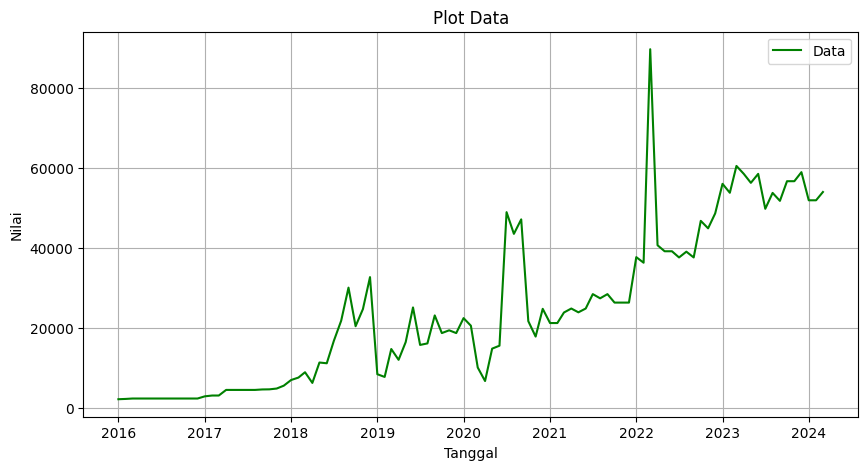

In [ ]:
# Plot data
plt.figure(figsize=(10, 5))
plt.plot(uni_data['ds'], uni_data['y'], label='Data', color='green')
plt.title('Plot Data')
plt.xlabel('Tanggal')
plt.ylabel('Nilai')
plt.legend()
plt.grid(True)
plt.show()

**PEMBAGIAN DATA LATIH, DATA UJI & DATA EVALUASI**


In [ ]:
# Pisahkan data menjadi set pelatihan dan pengujian (70 % data latih dan 30 % data uji 2016-2023)
# Filter data dari tahun 2016 hingga 2023
filtered_data = uni_data[(uni_data['ds'].dt.year >= 2016) & (uni_data['ds'].dt.year <= 2023)]

# Pisahkan data menjadi set pelatihan dan pengujian
train, test = train_test_split(filtered_data, test_size=0.3, shuffle=False)

# Mengambil data 2024 sebagai data evaluasi
evaluation=uni_data[uni_data['ds'].dt.year==2024]

print(f"Bentuk pelatihan: {train.shape} dan bentuk pengujian: {test.shape}")
print("\nDATA LATIH : ")
print(train)
print("\nDATA UJI : ")
print(test)
print("\nDATA EVALUASI : ")
print(evaluation)

Bentuk pelatihan: (67, 2) dan bentuk pengujian: (29, 2)

DATA LATIH : 
           ds      y
0  2016-01-01   2075
1  2016-02-01   2150
2  2016-03-01   2250
3  2016-04-01   2250
4  2016-05-01   2250
..        ...    ...
62 2021-03-01  23760
63 2021-04-01  24751
64 2021-05-01  23799
65 2021-06-01  24751
66 2021-07-01  28350

[67 rows x 2 columns]

DATA UJI : 
           ds      y
67 2021-08-01  27301
68 2021-09-01  28350
69 2021-10-01  26232
70 2021-11-01  26232
71 2021-12-01  26232
72 2022-01-01  37594
73 2022-02-01  36202
74 2022-03-01  89575
75 2022-04-01  40568
76 2022-05-01  39066
77 2022-06-01  39066
78 2022-07-01  37518
79 2022-08-01  38962
80 2022-09-01  37518
81 2022-10-01  46667
82 2022-11-01  44800
83 2022-12-01  48533
84 2023-01-01  55922
85 2023-02-01  53685
86 2023-03-01  60395
87 2023-04-01  58415
88 2023-05-01  56169
89 2023-06-01  58415
90 2023-07-01  49680
91 2023-08-01  53653
92 2023-09-01  51666
93 2023-10-01  56579
94 2023-11-01  56579
95 2023-12-01  58842

DATA EVALU

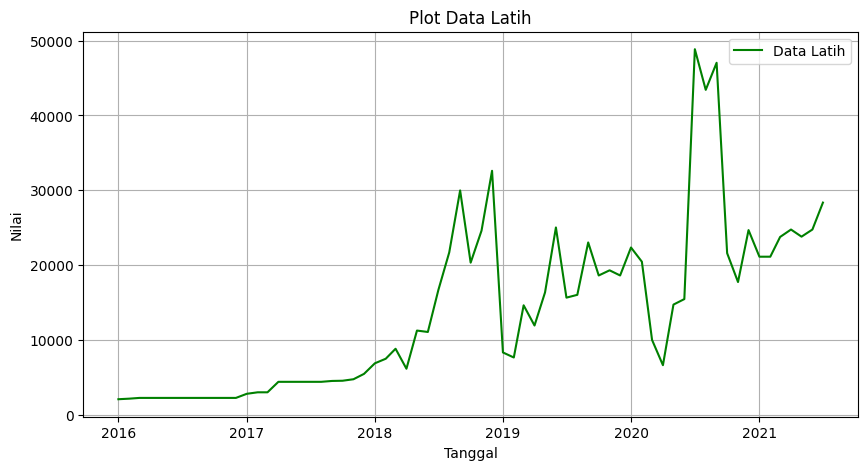

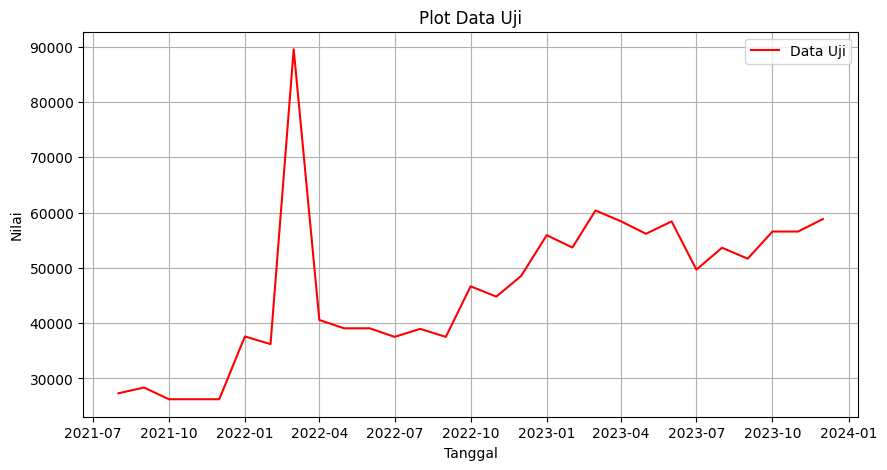

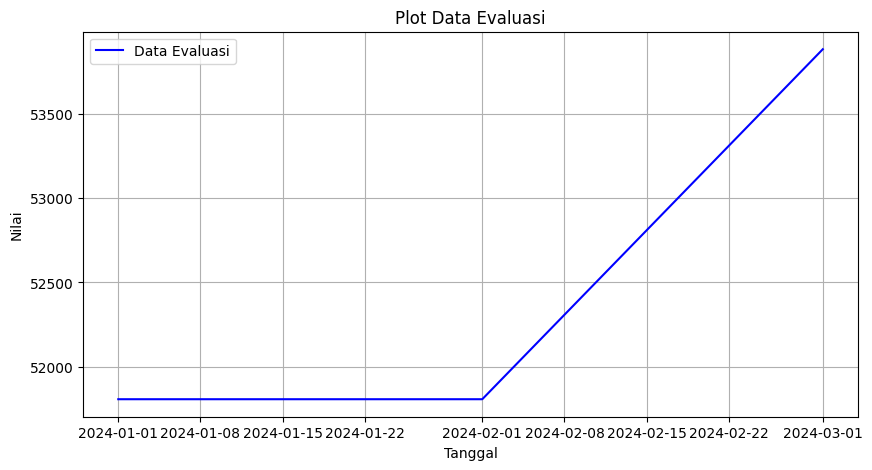

In [ ]:
# Plot data Latih
plt.figure(figsize=(10, 5))
plt.plot(train['ds'], train['y'], label='Data Latih', color='green')
plt.title('Plot Data Latih')
plt.xlabel('Tanggal')
plt.ylabel('Nilai')
plt.legend()
plt.grid(True)
plt.show()

# Plot data Uji
plt.figure(figsize=(10, 5))
plt.plot(test['ds'], test['y'], label='Data Uji', color='red')
plt.title('Plot Data Uji')
plt.xlabel('Tanggal')
plt.ylabel('Nilai')
plt.legend()
plt.grid(True)
plt.show()

# Plot data Evaluasi
plt.figure(figsize=(10, 5))
plt.plot(evaluation['ds'], evaluation['y'], label='Data Evaluasi', color='blue')
plt.title('Plot Data Evaluasi')
plt.xlabel('Tanggal')
plt.ylabel('Nilai')
plt.legend()
plt.grid(True)
plt.show()

**PEMODELAN HOLT-WINTERS**

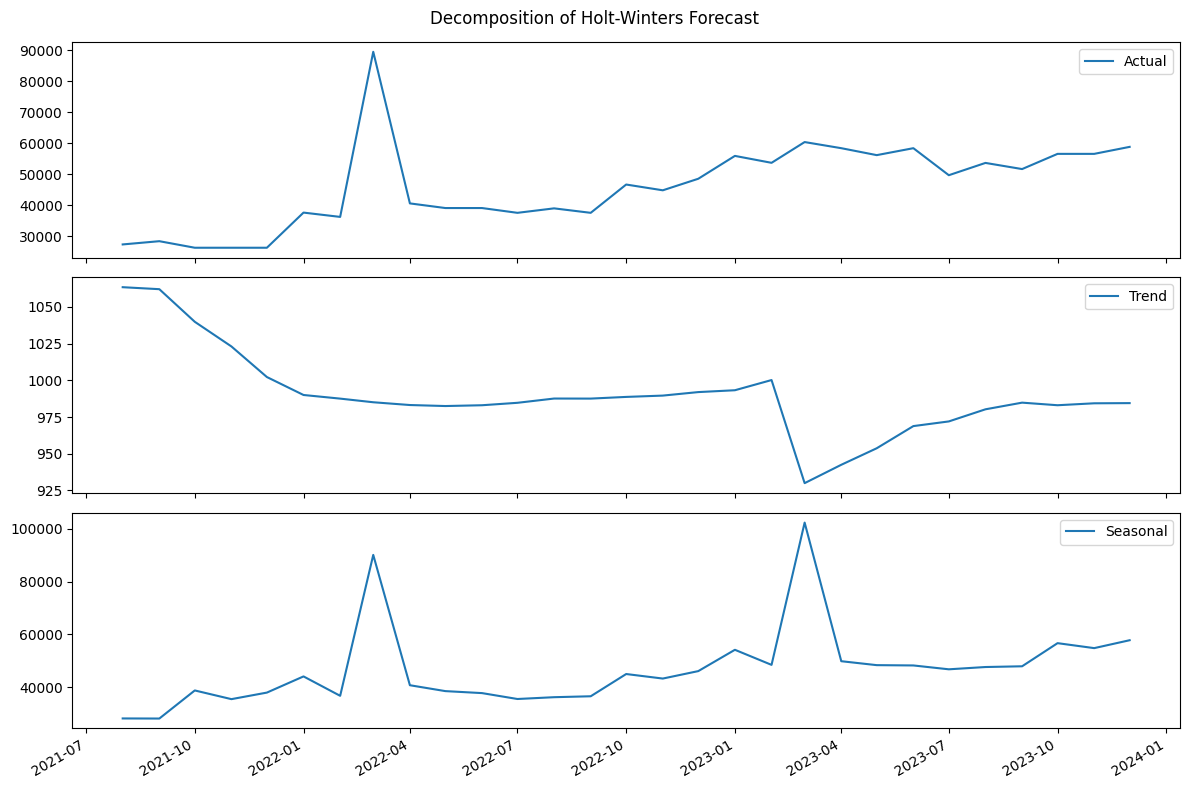

In [ ]:
# Fit the Holt-Winters model (replace 'additive' with the appropriate trend and seasonal type if needed)
fit = ExponentialSmoothing(test['y'], trend='additive', seasonal='additive', seasonal_periods=12).fit()

# Dekomposisi Holt-Winters
# The 'fit' object itself contains the decomposed components
trend_component = fit.trend
seasonal_component = fit.fittedvalues - fit.trend
residual_component = fit.resid

fig, axes = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

# Plot komponen-komponen
axes[0].plot(test['ds'], test['y'], label='Actual')
axes[1].plot(test['ds'], trend_component, label='Trend')
axes[2].plot(test['ds'], seasonal_component, label='Seasonal')

# Set label dan legenda
for ax in axes:
    ax.legend()
    ax.tick_params(axis='x', rotation=45)
    # Format sumbu x sebagai tanggal untuk setiap subplot
    fig.autofmt_xdate() # Move this line inside the loop

plt.suptitle('Decomposition of Holt-Winters Forecast')
plt.tight_layout()
plt.show()

In [ ]:
# Deklarasi variabel future_forecast_df_holt_winters di luar fungsi
future_forecast_df_holt_winters = pd.DataFrame()

# Fungsi untuk melakukan peramalan menggunakan Exponential Smoothing (fungsi dengan parameter)
def exp_smoothing(train, test, trend, seasonality, periods):
    global future_forecast_df_holt_winters  # Menggunakan variabel global untuk menyimpan hasil prediksi

    lowest_rmse = None  # Variabel untuk menyimpan nilai RMSE terendah
    lowest_rmse_model = None  # Variabel untuk menyimpan model dengan RMSE terendah
    best_forecast = None  # Variabel untuk menyimpan hasil peramalan terbaik

    # Loop melalui kombinasi trend, seasonality, dan periods
    for model in list(itertools.product(trend, seasonality, periods)):
        try:
            # Melatih model Exponential Smoothing dengan data latih
            fcast_model = ExponentialSmoothing(train['y'],
                                               trend=model[0],
                                               seasonal=model[1],
                                               seasonal_periods=model[2]).fit()
            # Melakukan peramalan pada data uji
            y_fcast = fcast_model.forecast(len(test)).rename('y_fcast')

            # Menghitung Root Mean Squared Error (RMSE)
            rmse = np.sqrt(np.mean((test['y'] - y_fcast)**2))

            current_rmse = rmse

            # Menyimpan model dengan RMSE terendah
            if lowest_rmse is None:
                lowest_rmse = rmse
                lowest_rmse_model = model
                best_forecast = y_fcast
            elif current_rmse <= lowest_rmse:
                lowest_rmse = current_rmse
                lowest_rmse_model = model
                best_forecast = y_fcast

        except ValueError:
            pass  # Lewati kombinasi yang tidak valid

    # Jika model terbaik ditemukan, lakukan langkah-langkah berikut
    if lowest_rmse_model is not None:
        print('Model Terbaik:')
        print('{} trend, {} seasonality, {} period - RMSE: {}'.format(lowest_rmse_model[0],
                                                                      lowest_rmse_model[1],
                                                                      lowest_rmse_model[2],
                                                                      lowest_rmse))

        # Cetak data uji dan prediksi
        print("\nData Uji dan Prediksi:")
        for i in range(len(test)):
            print("Tanggal: {}, Nilai Aktual: {}, Prediksi: {}".format(test['ds'].iloc[i],
                                                                       test['y'].iloc[i],
                                                                       best_forecast.iloc[i]))
        print()

        # Menghitung dan mencetak metrik evaluasi
        mape = mean_absolute_percentage_error(test['y'], best_forecast)
        mae = mean_absolute_error(test['y'], best_forecast)
        mse = mean_squared_error(test['y'], best_forecast)
        print(f"MAPE: {mape * 100:.2f}%")
        print(f"MAE: {mae:.2f}")
        print(f"MSE: {mse:.2f}")

        # Menggabungkan data latih dan data uji untuk prediksi masa depan
        combined_data = pd.concat([train, test])

        # Melakukan peramalan untuk tahun 2024-2025 menggunakan model terbaik
        full_model = ExponentialSmoothing(combined_data['y'],
                                          trend=lowest_rmse_model[0],
                                          seasonal=lowest_rmse_model[1],
                                          seasonal_periods=lowest_rmse_model[2]).fit()
        forecast_periods = 24  # 24 bulan untuk tahun 2024-2025
        future_forecast = full_model.forecast(forecast_periods).rename('future_forecast')

        # Membuat DataFrame untuk tanggal prediksi
        future_dates = pd.date_range(start='2024-01-01', periods=forecast_periods, freq='MS')
        future_forecast_df_holt_winters = pd.DataFrame({'ds': future_dates, 'future_forecast': future_forecast})

        # Cetak nilai hasil prediksi untuk 2024-2025
        print("\nPrediksi Penjualan untuk tahun 2024-2025:")
        for i in range(len(future_forecast_df_holt_winters)):
            print("Tanggal: {}, Prediksi: {}".format(future_forecast_df_holt_winters['ds'].iloc[i],
                                                     future_forecast_df_holt_winters['future_forecast'].iloc[i]))

        # Plot hasil - data latih dan uji dengan prediksi data uji
        plt.figure(figsize=(12, 6))
        plt.plot(train['ds'], train['y'], label='Data Latih')
        plt.plot(test['ds'], test['y'], label='Data Uji')
        plt.plot(test['ds'], best_forecast, label='Prediksi Data Uji')
        plt.legend()
        plt.title('{} trend, {} seasonality, {} period - Data Latih dan Uji dengan Prediksi'.format(lowest_rmse_model[0],
                                                                                                    lowest_rmse_model[1],
                                                                                                    lowest_rmse_model[2]))
        plt.show()

        # Plot hasil - prediksi 2024-2025
        plt.figure(figsize=(12, 6))
        plt.plot(future_forecast_df_holt_winters['ds'], future_forecast_df_holt_winters['future_forecast'], label='Prediksi 2024-2025')
        plt.xticks(pd.date_range(start=future_forecast_df_holt_winters['ds'].min(), end=future_forecast_df_holt_winters['ds'].max(), freq='MS'),
                   rotation=45)
        plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))  # Atur format tanggal
        plt.legend()
        plt.title('Prediksi Penjualan 2024-2025')
        plt.show()

        # Plot gabungan - data historis dan prediksi masa depan
        plt.figure(figsize=(12, 6))
        plt.plot(train['ds'], train['y'], label='Data Latih')
        plt.plot(test['ds'], test['y'], label='Data Uji')
        plt.plot(future_forecast_df_holt_winters['ds'], future_forecast_df_holt_winters['future_forecast'], label='Prediksi Masa Depan', color='red')
        plt.legend()
        plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))  # Atur format tanggal
        plt.title('Data Historis dan Prediksi Masa Depan')
        plt.show()

    else:
        print('No suitable model found.')

Model Terbaik:
additive trend, additive seasonality, 11 period - RMSE: 11378.415203509447

Data Uji dan Prediksi:
Tanggal: 2021-08-01 00:00:00, Nilai Aktual: 27301, Prediksi: 29194.782364484574
Tanggal: 2021-09-01 00:00:00, Nilai Aktual: 28350, Prediksi: 30799.706168350465
Tanggal: 2021-10-01 00:00:00, Nilai Aktual: 26232, Prediksi: 26441.83173056843
Tanggal: 2021-11-01 00:00:00, Nilai Aktual: 26232, Prediksi: 28914.769493465963
Tanggal: 2021-12-01 00:00:00, Nilai Aktual: 26232, Prediksi: 29805.8526121003
Tanggal: 2022-01-01 00:00:00, Nilai Aktual: 37594, Prediksi: 30092.770457060862
Tanggal: 2022-02-01 00:00:00, Nilai Aktual: 36202, Prediksi: 31737.990837749672
Tanggal: 2022-03-01 00:00:00, Nilai Aktual: 89575, Prediksi: 35973.37734098504
Tanggal: 2022-04-01 00:00:00, Nilai Aktual: 40568, Prediksi: 35070.77022206419
Tanggal: 2022-05-01 00:00:00, Nilai Aktual: 39066, Prediksi: 39417.11940951443
Tanggal: 2022-06-01 00:00:00, Nilai Aktual: 39066, Prediksi: 38901.99670761558
Tanggal: 2022

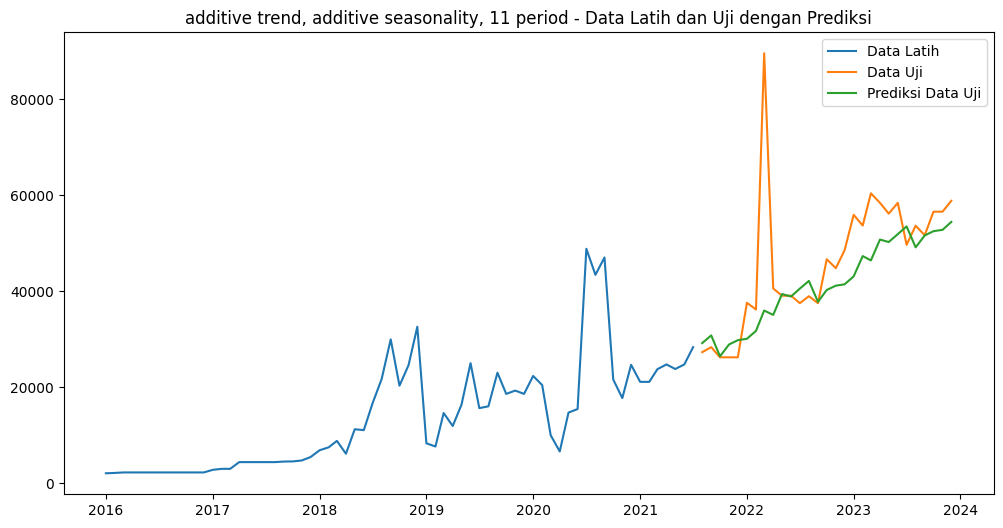

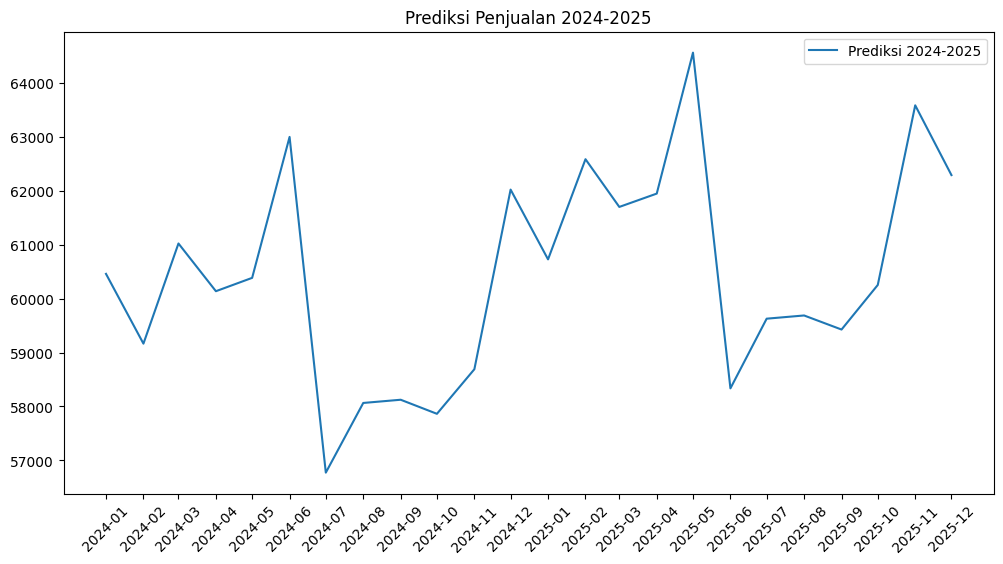

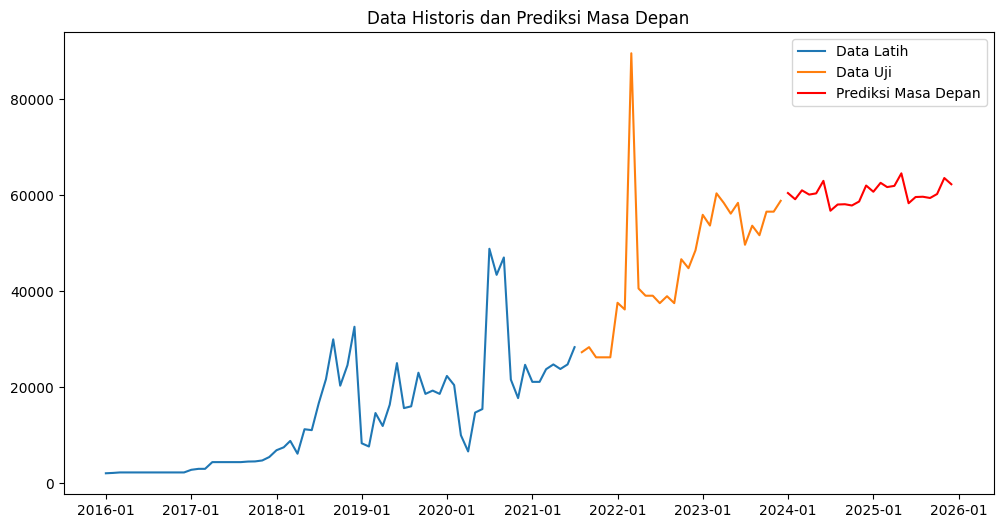

In [ ]:
# Mengatur parameter model
trend = ['additive', 'multiplicative']
seasonality = ['additive', 'multiplicative']
periods = range(1, 27)  # Periode dari 1 hingga 26

# Memanggil fungsi exp_smoothing
exp_smoothing(train, test, trend, seasonality, periods)

            ds  future_forecast
96  2024-01-01     60459.397634
97  2024-02-01     59165.415197
98  2024-03-01     61022.885286
99  2024-04-01     60137.854253
100 2024-05-01     60385.248199
101 2024-06-01     62999.030660
102 2024-07-01     56773.711924
103 2024-08-01     58065.721990
104 2024-09-01     58125.264842
105 2024-10-01     57864.400719
106 2024-11-01     58691.106823
107 2024-12-01     62022.034056
108 2025-01-01     60728.051619
109 2025-02-01     62585.521708
110 2025-03-01     61700.490675
111 2025-04-01     61947.884621
112 2025-05-01     64561.667082
113 2025-06-01     58336.348346
114 2025-07-01     59628.358412
115 2025-08-01     59687.901263
116 2025-09-01     59427.037141
117 2025-10-01     60253.743245
118 2025-11-01     63584.670478
119 2025-12-01     62290.688041


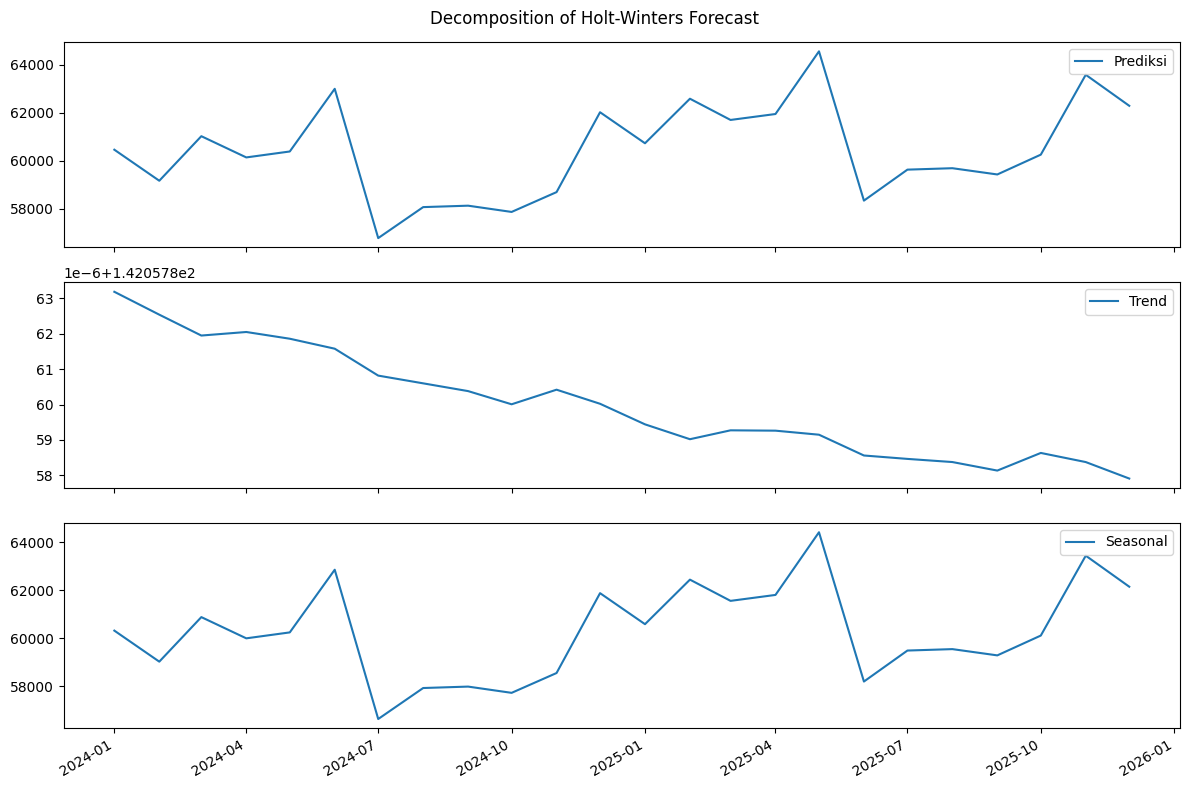

In [ ]:
print(future_forecast_df_holt_winters)

# Fit the Holt-Winters model (replace 'additive' with the appropriate trend and seasonal type if needed)
fit = ExponentialSmoothing(future_forecast_df_holt_winters['future_forecast'], trend='additive', seasonal='additive', seasonal_periods=11).fit()

# Dekomposisi Holt-Winters
# The 'fit' object itself contains the decomposed components
trend_component = fit.trend
seasonal_component = fit.fittedvalues - fit.trend
residual_component = fit.resid

fig, axes = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

# Plot komponen-komponen
axes[0].plot(future_forecast_df_holt_winters['ds'], future_forecast_df_holt_winters['future_forecast'], label='Prediksi')
axes[1].plot(future_forecast_df_holt_winters['ds'], trend_component, label='Trend')
axes[2].plot(future_forecast_df_holt_winters['ds'], seasonal_component, label='Seasonal')

# Set label dan legenda
for ax in axes:
    ax.legend()
    ax.tick_params(axis='x', rotation=45)
    # Format sumbu x sebagai tanggal untuk setiap subplot
    fig.autofmt_xdate() # Move this line inside the loop

plt.suptitle('Decomposition of Holt-Winters Forecast')
plt.tight_layout()
plt.show()

**PEMODELAN PROPHET**

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1jvozdik/yl3sbrgr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1jvozdik/5hv_7jd8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41484', 'data', 'file=/tmp/tmp1jvozdik/yl3sbrgr.json', 'init=/tmp/tmp1jvozdik/5hv_7jd8.json', 'output', 'file=/tmp/tmp1jvozdik/prophet_model42t7_6j8/prophet_model-20240704090117.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
09:01:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:01:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:

           ds          yhat    yhat_lower    yhat_upper      y
0  2021-08-01  28451.819919  24758.260302  32124.983225  27301
1  2021-09-01  29643.551844  26003.964911  33144.437415  28350
2  2021-10-01  30020.439160  26519.888923  33429.333653  26232
3  2021-11-01  28766.832311  25211.940094  32289.923114  26232
4  2021-12-01  28653.883177  25302.739336  32444.575873  26232
5  2022-01-01  36160.663901  32751.034802  39578.044456  37594
6  2022-02-01  32273.150208  28980.526492  36027.821884  36202
7  2022-03-01  84562.734392  80859.990263  88146.788284  89575
8  2022-04-01  36532.115168  33144.520158  40189.112488  40568
9  2022-05-01  36648.874553  33020.316764  40303.942769  39066
10 2022-06-01  38833.665268  35128.296305  42572.533973  39066
11 2022-07-01  39349.412033  35763.724068  42684.862440  37518
12 2022-08-01  40004.733196  36520.689637  43671.627752  38962
13 2022-09-01  39179.620108  35695.657929  42641.466834  37518
14 2022-10-01  43127.379260  39662.298770  46640.909668

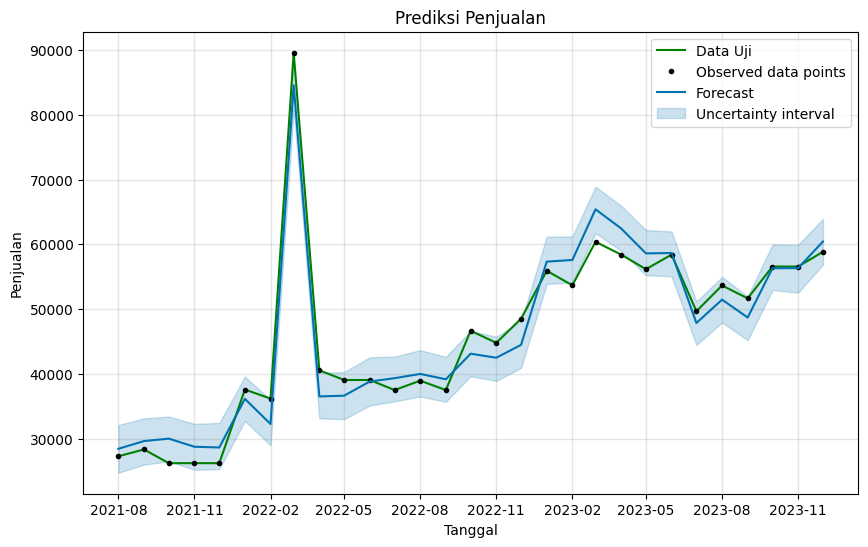

In [ ]:
# Melatih model Prophet
uni_model = Prophet()
uni_model.fit(test)

# Buat DataFrame masa depan untuk prediksi, atur frekuensi ke bulanan
future_uni = uni_model.make_future_dataframe(periods=0, freq='MS')

# Buat prediksi
forecast_uni = uni_model.predict(future_uni)

# Gabungkan nilai aktual 'y' dari DataFrame 'test' ke 'forecast_uni' berdasarkan tanggal ('ds')
forecast_uni = forecast_uni.merge(test[['ds', 'y']], on='ds', how='left')

# Tampilkan prediksi, termasuk nilai aktual jika tersedia
print(forecast_uni[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'y']])

# Plot prediksi dengan data latih dan data aktual dengan garis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot data aktual dalam set pengujian (asumsikan Anda memiliki DataFrame 'test')
ax.plot(test['ds'], test['y'], label='Data Uji', color='green', linestyle='-')

# Plot prediksi (menggunakan objek axes yang sama)
uni_model.plot(forecast_uni, ax=ax)

plt.title("Prediksi Penjualan")
plt.xlabel("Tanggal")
plt.ylabel("Penjualan")
plt.legend()
plt.show()


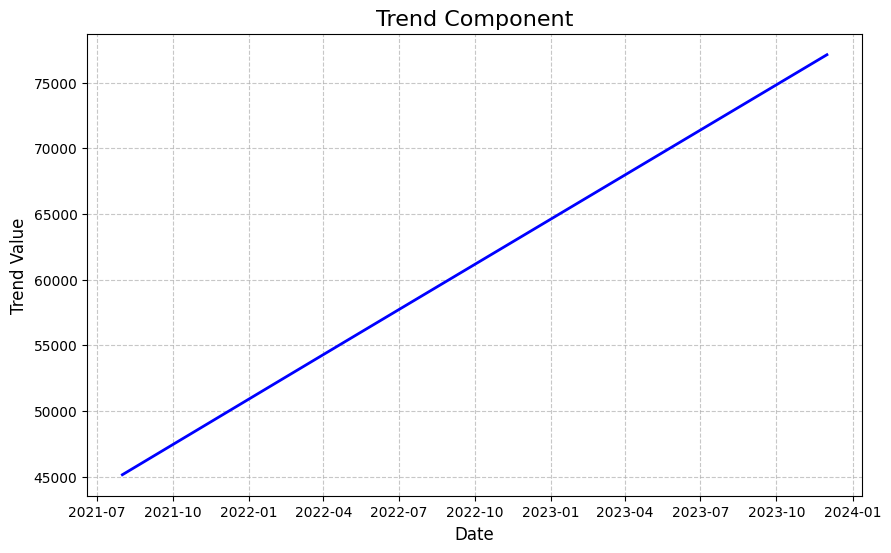

In [ ]:
# Extract trend and yearly seasonality data
trend = forecast_uni[['ds', 'trend']].set_index('ds')
yearly = forecast_uni[['ds', 'yearly']].set_index('ds')

# Plot the trend
plt.figure(figsize=(10, 6))
plt.plot(trend, color='blue', linewidth=2)
plt.title('Trend Component', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Trend Value', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


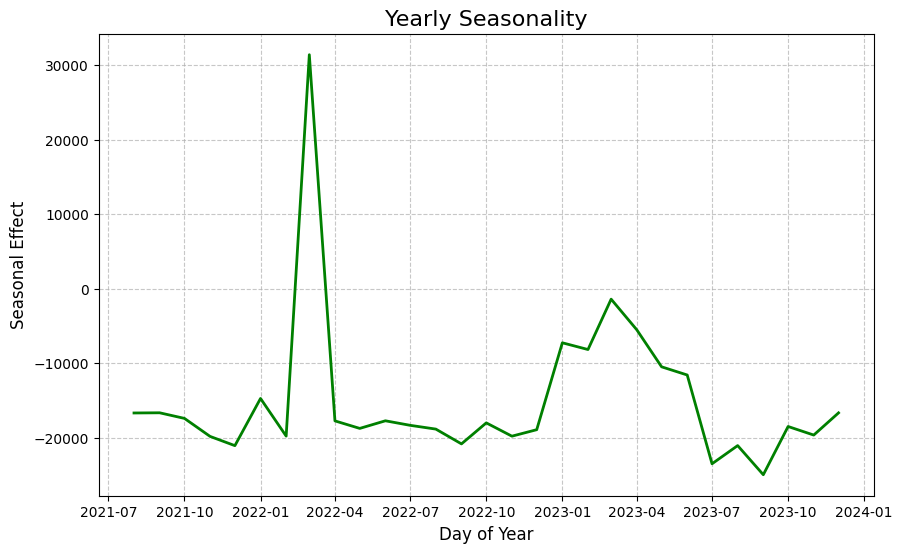

In [ ]:

# Plot the yearly seasonality
plt.figure(figsize=(10, 6))
plt.plot(yearly, color='green', linewidth=2)
plt.title('Yearly Seasonality', fontsize=16)
plt.xlabel('Day of Year', fontsize=12)
plt.ylabel('Seasonal Effect', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

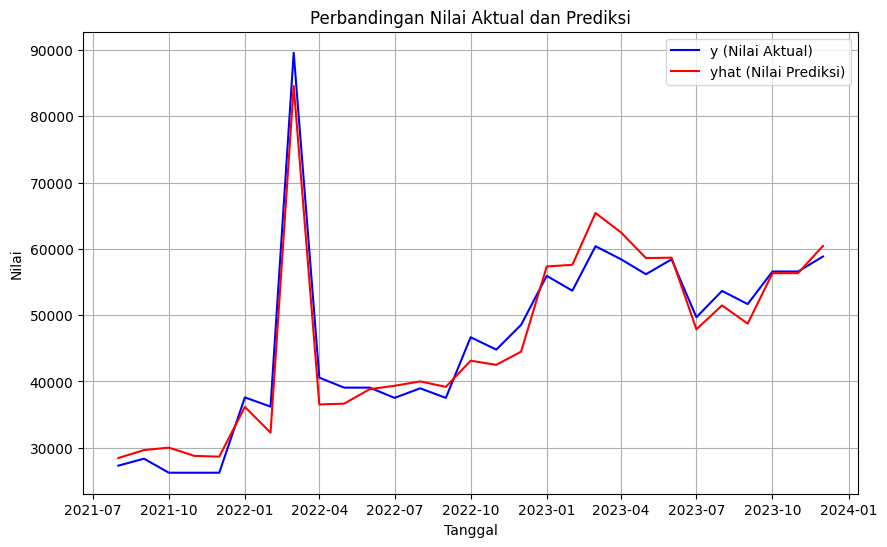

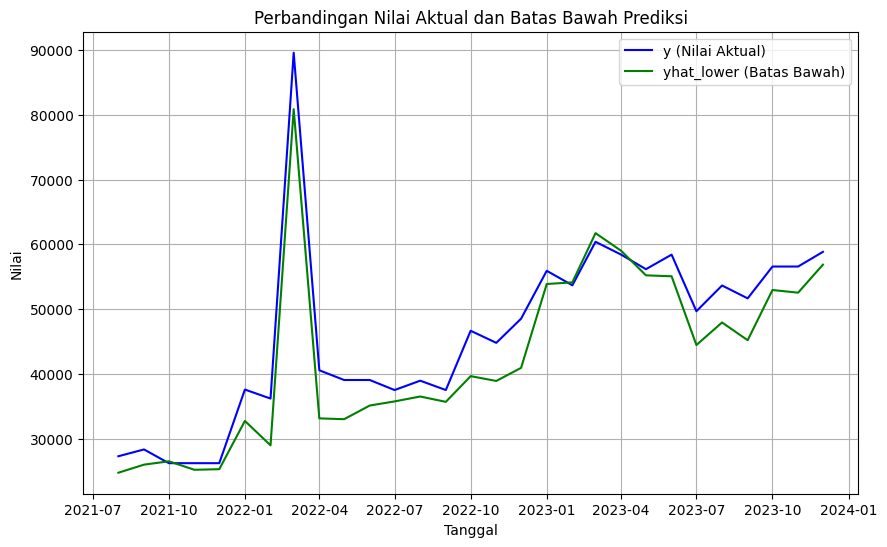

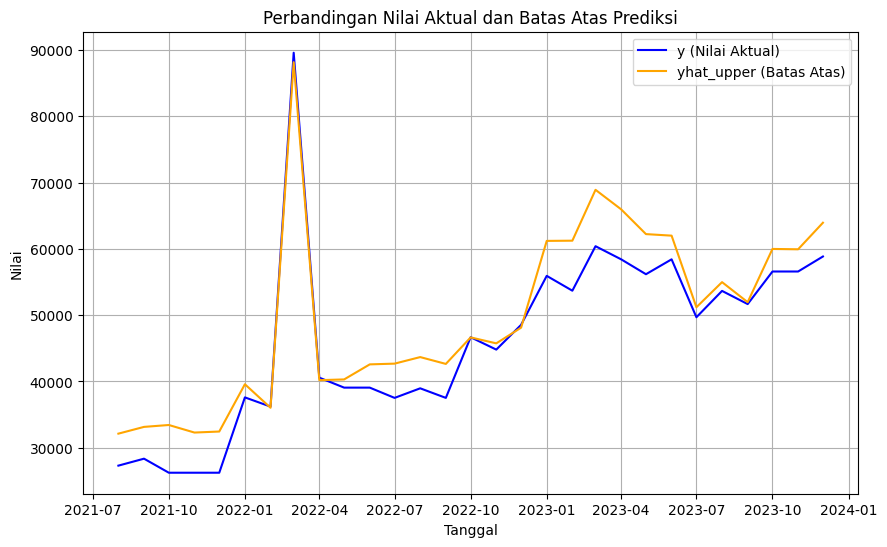

In [ ]:
# Buat plot y vs yhat
plt.figure(figsize=(10, 6))
plt.plot(forecast_uni['ds'], forecast_uni['y'], label='y (Nilai Aktual)', color='blue')
plt.plot(forecast_uni['ds'], forecast_uni['yhat'], label='yhat (Nilai Prediksi)', color='red')
plt.xlabel('Tanggal')
plt.ylabel('Nilai')
plt.title('Perbandingan Nilai Aktual dan Prediksi')
plt.legend()
plt.grid(True)
plt.show()

# Buat plot y vs yhat_lower
plt.figure(figsize=(10, 6))
plt.plot(forecast_uni['ds'], forecast_uni['y'], label='y (Nilai Aktual)', color='blue')
plt.plot(forecast_uni['ds'], forecast_uni['yhat_lower'], label='yhat_lower (Batas Bawah)', color='green')
plt.xlabel('Tanggal')
plt.ylabel('Nilai')
plt.title('Perbandingan Nilai Aktual dan Batas Bawah Prediksi')
plt.legend()
plt.grid(True)
plt.show()

# Buat plot y vs yhat_upper
plt.figure(figsize=(10, 6))
plt.plot(forecast_uni['ds'], forecast_uni['y'], label='y (Nilai Aktual)', color='blue')
plt.plot(forecast_uni['ds'], forecast_uni['yhat_upper'], label='yhat_upper (Batas Atas)', color='orange')
plt.xlabel('Tanggal')
plt.ylabel('Nilai')
plt.title('Perbandingan Nilai Aktual dan Batas Atas Prediksi')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:


# Filter forecast_uni to only include predictions for the test set
forecast_test = forecast_uni[forecast_uni['ds'].isin(test['ds'])]

# Menghitung nilai MAPE
mape = mean_absolute_percentage_error(test['y'], forecast_test['yhat'])
print(f"\nMAPE: {mape * 100:.2f}%")

# Menghitung nilai MAE
mae = mean_absolute_error(test['y'], forecast_test['yhat'])
print(f"MAE: {mae:.2f}")

# Menghitung nilai MSE
mse = mean_squared_error(test['y'], forecast_test['yhat'])
print(f"MSE: {mse:.2f}")


MAPE: 5.48%
MAE: 2371.41
MSE: 7581915.23


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1jvozdik/hwx_m3ik.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1jvozdik/emfo58ju.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41686', 'data', 'file=/tmp/tmp1jvozdik/hwx_m3ik.json', 'init=/tmp/tmp1jvozdik/emfo58ju.json', 'output', 'file=/tmp/tmp1jvozdik/prophet_modelnziz1ils/prophet_model-20240704090120.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
09:01:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:01:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


            ds          yhat    yhat_lower    yhat_upper   y
96  2024-01-01  52956.595822  42896.372360  63137.038659 NaN
97  2024-02-01  50328.135268  39526.627745  60828.845882 NaN
98  2024-03-01  59442.163506  49212.610984  69825.334635 NaN
99  2024-04-01  54786.059404  43507.261858  65088.683031 NaN
100 2024-05-01  55485.000715  45658.242841  65342.099448 NaN
101 2024-06-01  52968.946432  42766.430594  63310.355353 NaN
102 2024-07-01  66150.268145  54943.744115  77063.932772 NaN
103 2024-08-01  63617.224361  52709.429142  73999.586031 NaN
104 2024-09-01  65414.684060  54071.999343  75316.054787 NaN
105 2024-10-01  57343.046841  46932.512103  67142.531134 NaN
106 2024-11-01  58028.747633  47989.359947  68570.167409 NaN
107 2024-12-01  63024.572633  52413.376527  73918.766864 NaN
108 2025-01-01  64749.387190  53846.914912  74993.282646 NaN
109 2025-02-01  66346.847222  54813.895634  76732.227543 NaN
110 2025-03-01  69516.879764  59361.423996  80084.621238 NaN
111 2025-04-01  63280.67

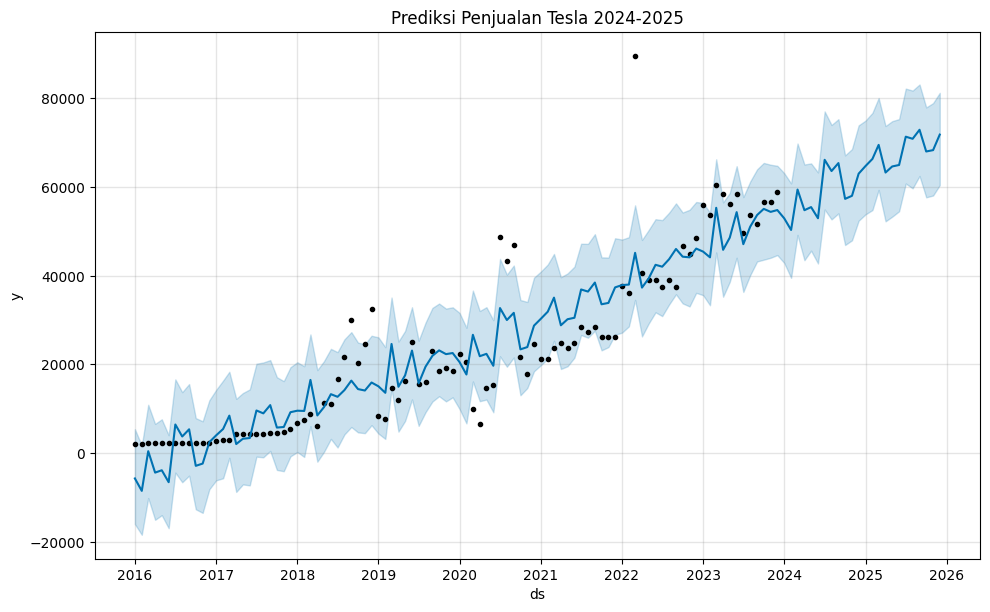

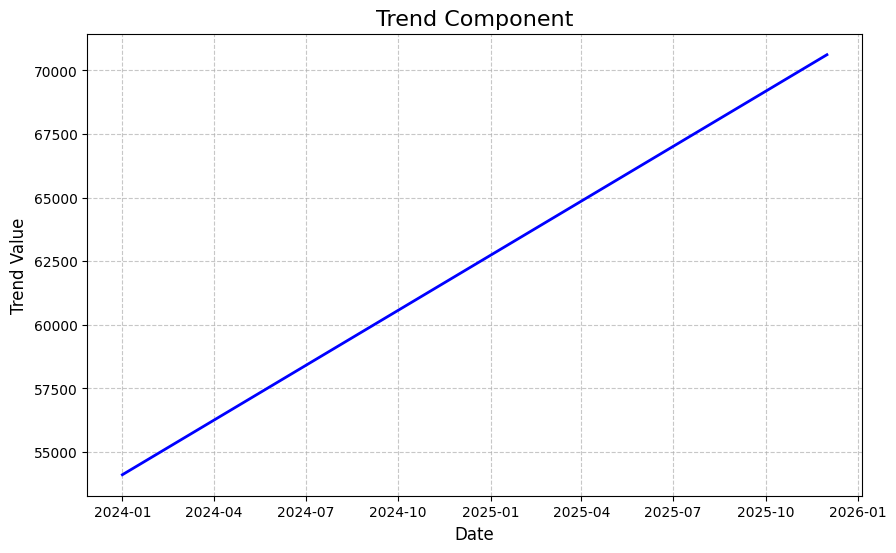

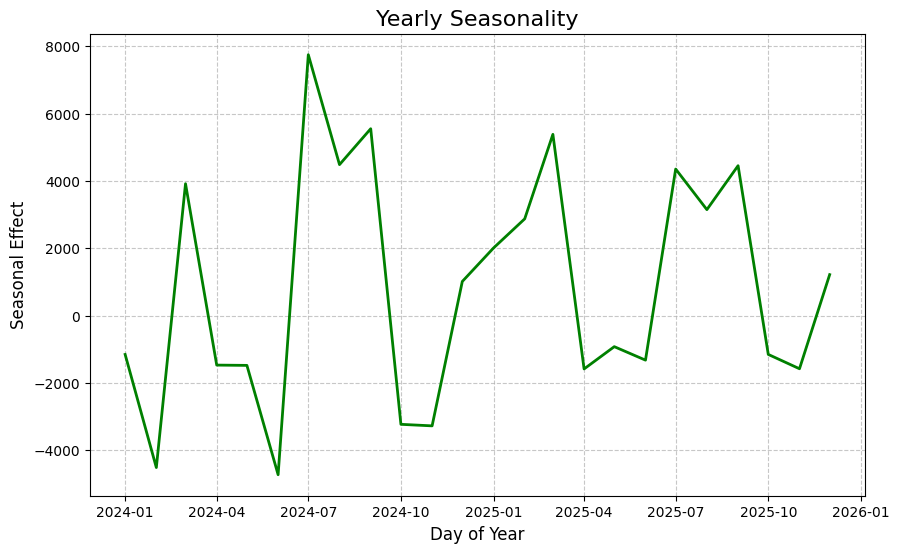

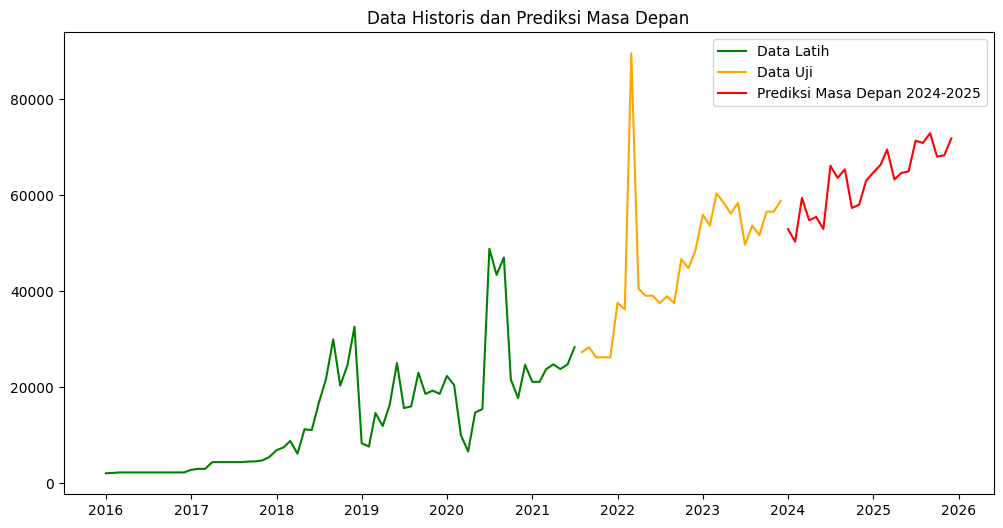

In [ ]:
# Menggabungkan data latih dan uji untuk melatih model
combined_data = pd.concat([train, test])

# Melatih model Prophet
model = Prophet()
model.fit(combined_data)

# Buat DataFrame masa depan untuk prediksi (24 bulan ke depan)
future = model.make_future_dataframe(periods=24, freq='MS')

# Buat prediksi
forecast = model.predict(future)

# Tampilkan prediksi, termasuk nilai aktual jika tersedia
# Nilai aktual dari data uji 'y' diubah ke forecast berdasarkan 'ds'
forecast = forecast.merge(combined_data[['ds', 'y']], on='ds', how='left')

# Filter hanya prediksi untuk tahun 2024-2025
forecast_2024_2025_prophet = forecast[(forecast['ds'] >= '2024-01-01') & (forecast['ds'] <= '2025-12-31')]

# Tampilkan hasil prediksi untuk tahun 2024-2025
print(forecast_2024_2025_prophet[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'y']])

# Plot hasil prediksi
model.plot(forecast)
plt.title('Prediksi Penjualan Tesla 2024-2025')
plt.show()
# Extract trend and yearly seasonality data
trend = forecast_2024_2025_prophet[['ds', 'trend']].set_index('ds')
yearly = forecast_2024_2025_prophet[['ds', 'yearly']].set_index('ds')
# Plot the trend
plt.figure(figsize=(10, 6))
plt.plot(trend, color='blue', linewidth=2)
plt.title('Trend Component', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Trend Value', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Plot the yearly seasonality
plt.figure(figsize=(10, 6))
plt.plot(yearly, color='green', linewidth=2)
plt.title('Yearly Seasonality', fontsize=16)
plt.xlabel('Day of Year', fontsize=12)
plt.ylabel('Seasonal Effect', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Plot hasil - data latih, data uji, dan prediksi masa depan
plt.figure(figsize=(12, 6))

# Plot data latih
plt.plot(train['ds'], train['y'], label='Data Latih', color='green')

# Plot data uji
plt.plot(test['ds'], test['y'], label='Data Uji', color='orange')

# Plot prediksi masa depan hanya untuk 2024-2025
future_forecast = forecast[forecast['ds'] >= '2024-01-01']
plt.plot(future_forecast['ds'], future_forecast['yhat'], label='Prediksi Masa Depan 2024-2025', color='red')

plt.legend()
plt.title('Data Historis dan Prediksi Masa Depan')
plt.show()

**MELAKUKAN EVALUASI PERBANDINGAN METODE HOLT-WINTERS DENGAN PROPHET**

In [ ]:

# Menggabungkan data evaluasi dengan prediksi Holt-Winters dan Prophet
merged_df = evaluation.merge(future_forecast_df_holt_winters, on='ds', how='left').merge(forecast_2024_2025_prophet, on='ds', how='left')

# Rename 'y_x' to 'y'
merged_df = merged_df.rename(columns={'y_x': 'y'})

# Menghitung metrik evaluasi untuk Holt-Winters
mape_holt_winters = mean_absolute_percentage_error(merged_df['y'], merged_df['future_forecast'])
mae_holt_winters = mean_absolute_error(merged_df['y'], merged_df['future_forecast'])
mse_holt_winters = mean_squared_error(merged_df['y'], merged_df['future_forecast'])

# Menghitung metrik evaluasi untuk Prophet
mape_prophet = mean_absolute_percentage_error(merged_df['y'], merged_df['yhat'])
mae_prophet = mean_absolute_error(merged_df['y'], merged_df['yhat'])
mse_prophet = mean_squared_error(merged_df['y'], merged_df['yhat'])

# Membuat DataFrame untuk hasil evaluasi
evaluation_results = pd.DataFrame({
    'Model': ['Holt-Winters', 'Prophet'],
    'MAPE': [f"{mape_holt_winters * 100:.2f}%", f"{mape_prophet * 100:.2f}%"],
    'MAE': [f"{mae_holt_winters:.2f}", f"{mae_prophet:.2f}"],
    'MSE': [mse_holt_winters, mse_prophet]
})
# Menampilkan tabel hasil evaluasi
print("Hasil Evaluasi:")
print(evaluation_results.to_string(index=False))

# Membuat DataFrame untuk data prediksi dan aktual
prediction_data = merged_df[['ds', 'y', 'future_forecast', 'yhat']].copy()
prediction_data['ds'] = pd.to_datetime(prediction_data['ds']).dt.strftime('%Y-%m-%d')  # Format tanggal

# Membuat DataFrame untuk hasil evaluasi
evaluation_results = pd.DataFrame({
    'Model': ['Holt-Winters', 'Prophet'],
    'MAPE': [f"{mape_holt_winters * 100:.2f}%", f"{mape_prophet * 100:.2f}%"],
    'MAE': [f"{mae_holt_winters:.2f}", f"{mae_prophet:.2f}"],
    'MSE': [f"{mse_holt_winters:,.0f}", f"{mse_prophet:,.0f}"] # Format MSE to two decimal places
})

# Rename columns
prediction_data.rename(columns={
    'ds': 'Tanggal',
    'y': 'Data Aktual',
    'future_forecast': 'Peramalan Holt-Winters',
    'yhat': 'Peramalan Prophet'
}, inplace=True)

# Print updated dataframe
print(prediction_data)


Hasil Evaluasi:
       Model   MAPE     MAE          MSE
Holt-Winters 14.72% 7716.23 5.998425e+07
     Prophet  5.13% 2729.87 1.147883e+07
      Tanggal  Data Aktual  Peramalan Holt-Winters  Peramalan Prophet
0  2024-01-01        51809            60459.397634       52956.595822
1  2024-02-01        51809            59165.415197       50328.135268
2  2024-03-01        53881            61022.885286       59442.163506
